### Construct simulation network

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plts
import random
import numpy as np
import json

from simulation_runner import plot_results, run_simulation_ctx, load_params

### Striatum - GPe - STN - Cortex Simulator

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
INFO       The synaptic equation for the variable s_AMPA_ext does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]
INFO       No numerical integration method specified for group 'synapses_10', using method 'exact' (took 0.14s). [brian2.st

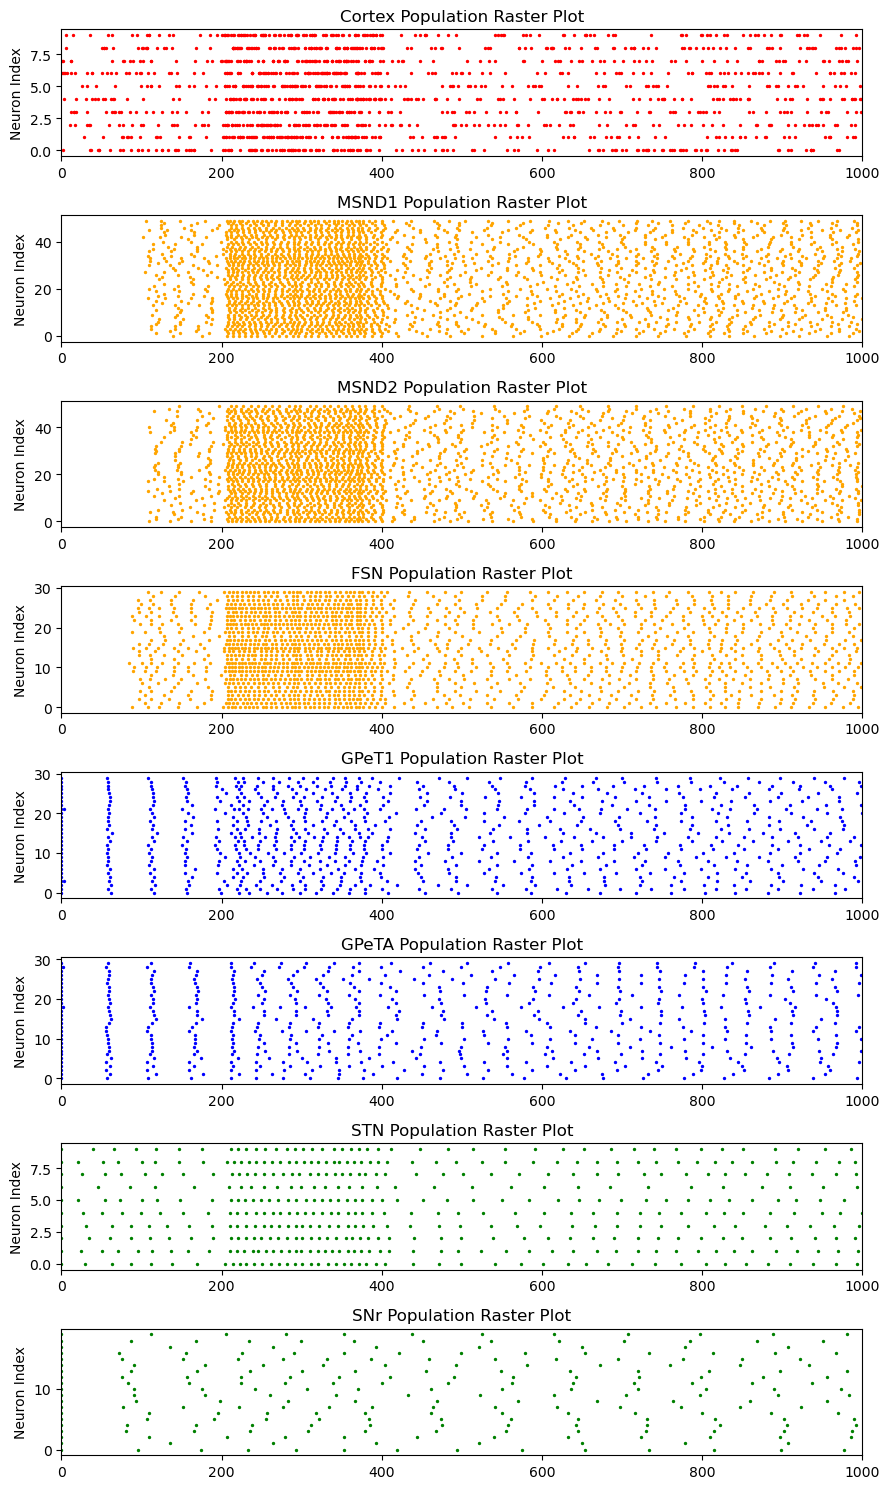

In [3]:
### Result with inh/ext input with neurons (normal) 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_raster
from brian2 import *

fsn_params_file = './params_ref/FSN_1.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 30
N_GPe = 30 # 988
N_STN = 10 # 388
N_MSN = 50 # 37971
N_SNr = 20 # 754

results1 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_raster(results1)

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


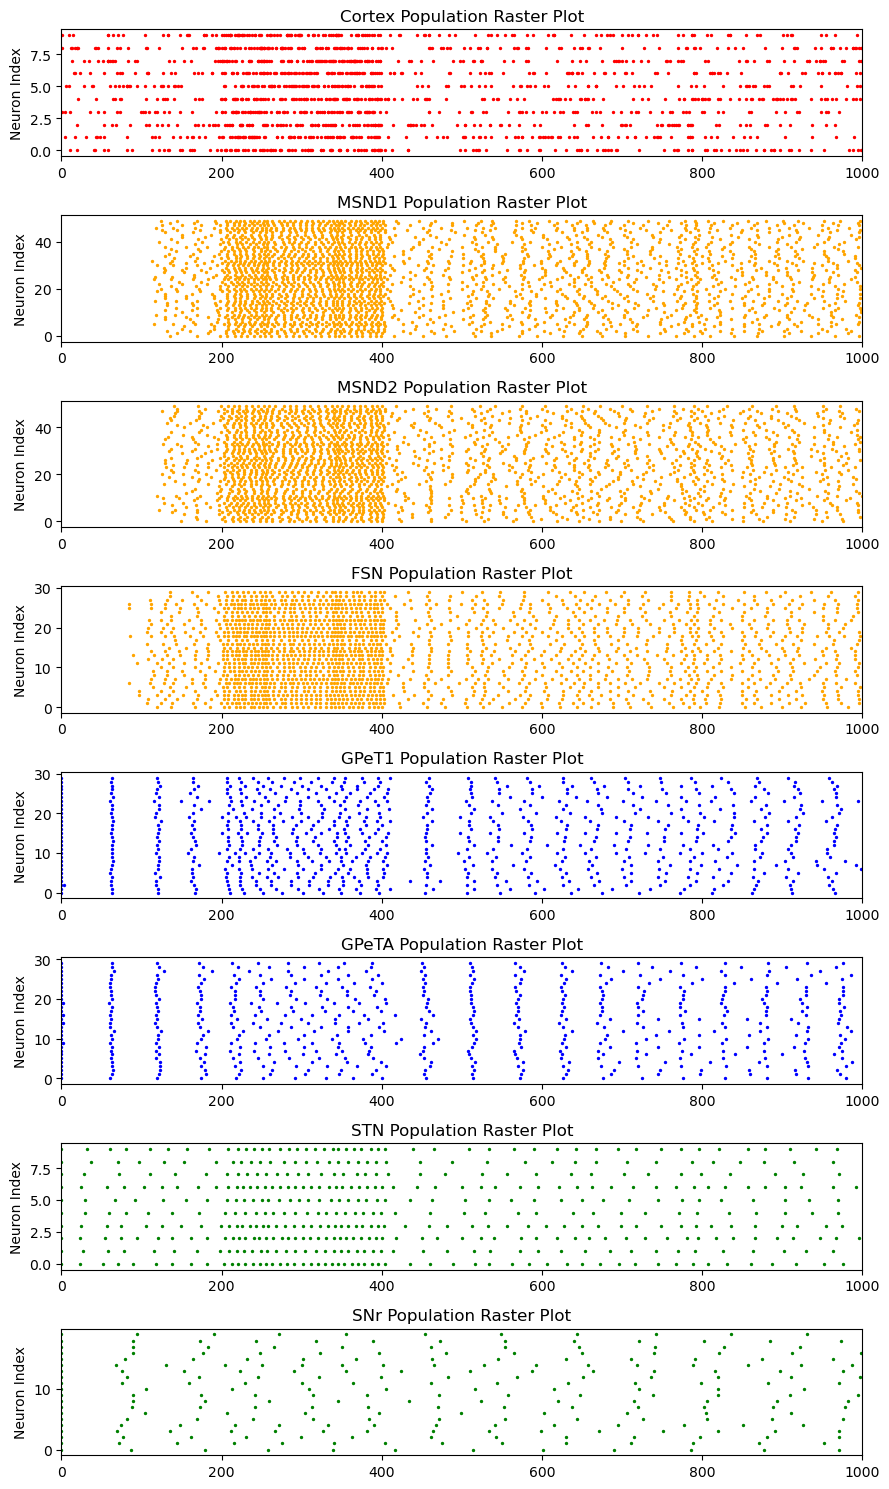

In [6]:
### Result with inh/ext input with neurons (normal) 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_raster
from brian2 import *

fsn_params_file = './params_ref/FSN_1_dop.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_dop.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_dop.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 30
N_GPe = 30 # 988
N_STN = 10 # 388
N_MSN = 50 # 37971
N_SNr = 20 # 754

results2 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_raster(results1)

WARNING    /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/ipykernel_2357/2686890510.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(neuron_types))  # Use a colormap with different colors
 [py.warnings]


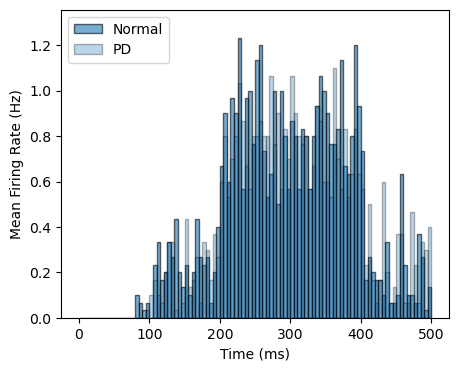

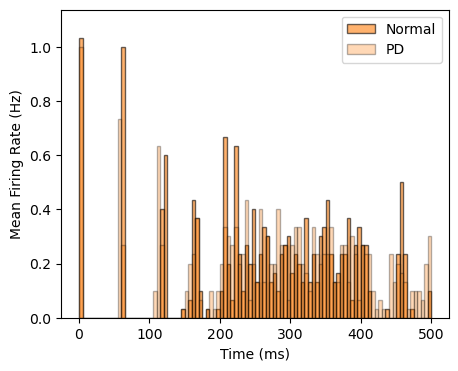

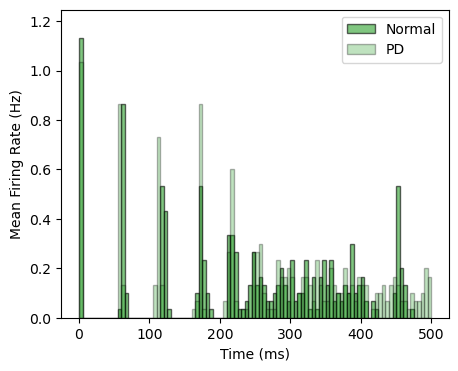

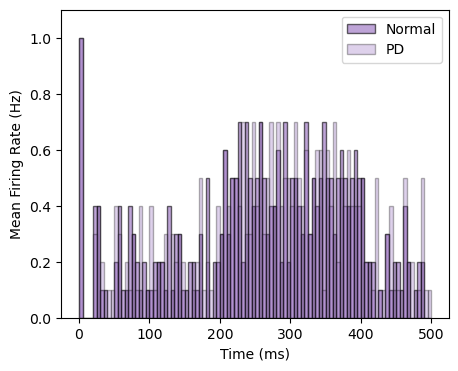

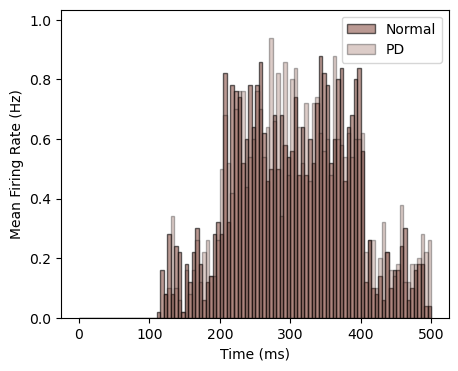

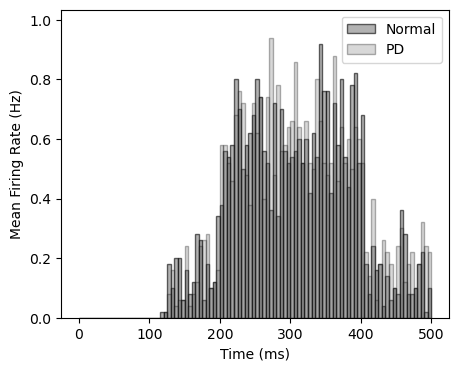

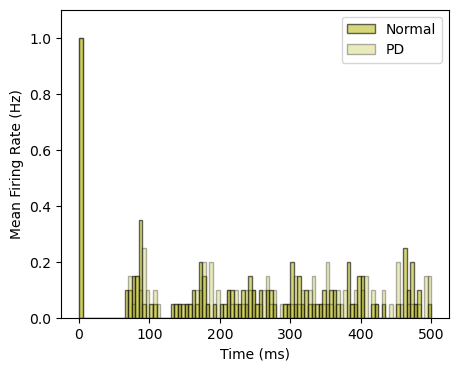

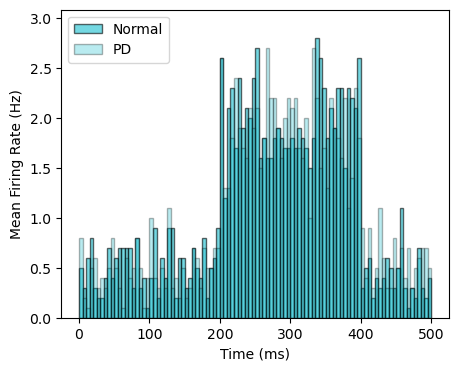

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

def plot_firing_rate_histogram_comparison(results1, results2, neuron_types, bin_size=5*ms, simulation_time=500*ms):
    """
    Plot and compare histograms of firing rates for each neuron type from two different experiments,
    with a shared y-axis range for each neuron type.
    
    Parameters:
    - results1: Dictionary containing the spike monitors for the first experiment.
    - results2: Dictionary containing the spike monitors for the second experiment.
    - neuron_types: List of neuron types to plot (e.g., ['gpe', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']).
    - bin_size: Time bin size for calculating firing rates (default: 5 ms).
    - simulation_time: Total time of the simulation (default: 500 ms).
    """
    num_bins = int(simulation_time / bin_size)
    bins = np.linspace(0, float(simulation_time/ms), num_bins + 1)  # Bins in ms
    
    colors = plt.cm.get_cmap('tab10', len(neuron_types))  # Use a colormap with different colors

    # First, calculate the maximum firing rate across both experiments for y-axis scaling
    max_firing_rates = {}
    
    for neuron_type in neuron_types:
        firing_rates_1 = []
        firing_rates_2 = []
        
        # Extract spike times from both results for the current neuron type
        spike_monitor_1 = results1[f'spike_monitor_{neuron_type}']
        spike_monitor_2 = results2[f'spike_monitor_{neuron_type}']
        
        spike_times_1 = spike_monitor_1.t / ms
        spike_times_2 = spike_monitor_2.t / ms
        
        neuron_indices_1 = spike_monitor_1.i
        neuron_indices_2 = spike_monitor_2.i
        
        # Calculate firing rates for each neuron in both experiments
        for neuron_id in np.unique(neuron_indices_1):
            neuron_spike_times_1 = spike_times_1[neuron_indices_1 == neuron_id]
            hist_1, _ = np.histogram(neuron_spike_times_1, bins=bins)
            firing_rates_1.append(hist_1)
        
        for neuron_id in np.unique(neuron_indices_2):
            neuron_spike_times_2 = spike_times_2[neuron_indices_2 == neuron_id]
            hist_2, _ = np.histogram(neuron_spike_times_2, bins=bins)
            firing_rates_2.append(hist_2)
        
        # Mean firing rate for both experiments
        mean_firing_rate_1 = np.mean(firing_rates_1, axis=0)
        mean_firing_rate_2 = np.mean(firing_rates_2, axis=0)
        
        # Find the maximum firing rate across both experiments for this neuron type
        max_firing_rates[neuron_type] = max(np.max(mean_firing_rate_1), np.max(mean_firing_rate_2))
    
    # Now plot the histograms with the same y-axis limit for each neuron type
    for idx, neuron_type in enumerate(neuron_types):
        spike_monitor_1 = results1[f'spike_monitor_{neuron_type}']
        spike_monitor_2 = results2[f'spike_monitor_{neuron_type}']
        
        spike_times_1 = spike_monitor_1.t / ms
        spike_times_2 = spike_monitor_2.t / ms
        
        neuron_indices_1 = spike_monitor_1.i
        neuron_indices_2 = spike_monitor_2.i
        
        firing_rates_1 = []
        firing_rates_2 = []
        
        for neuron_id in np.unique(neuron_indices_1):
            neuron_spike_times_1 = spike_times_1[neuron_indices_1 == neuron_id]
            hist_1, _ = np.histogram(neuron_spike_times_1, bins=bins)
            firing_rates_1.append(hist_1)
        
        for neuron_id in np.unique(neuron_indices_2):
            neuron_spike_times_2 = spike_times_2[neuron_indices_2 == neuron_id]
            hist_2, _ = np.histogram(neuron_spike_times_2, bins=bins)
            firing_rates_2.append(hist_2)
        
        mean_firing_rate_1 = np.mean(firing_rates_1, axis=0)
        mean_firing_rate_2 = np.mean(firing_rates_2, axis=0)
        
        max_y = max_firing_rates[neuron_type]  # Set the y-axis limit to the max firing rate
        
        # Plot the results for both experiments
        plt.figure(figsize=(5, 4))
        
        # Experiment 1
        plt.bar(bins[:-1], mean_firing_rate_1, width=bin_size/ms, align='edge', 
                color=colors(idx), alpha=0.6, label='Normal', edgecolor='black')
        
        # Experiment 2
        plt.bar(bins[:-1], mean_firing_rate_2, width=bin_size/ms, align='edge', 
                color=colors(idx), alpha=0.3, label='PD', edgecolor='black')
        
        plt.ylim(0, max_y * 1.1)  
        
        plt.xlabel('Time (ms)')
        plt.ylabel('Mean Firing Rate (Hz)')
        # plt.title(f'{neuron_type}')
        plt.legend()
        plt.show()

# Example usage:
neuron_types = ['fsn', 'gpet1','gpeta', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']
plot_firing_rate_histogram_comparison(results1, results2, neuron_types, bin_size=5*ms)